In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-3-dai/tips (data for regression problem).csv


In [2]:
tips_data=pd.read_csv('/kaggle/input/assignment-3-dai/tips (data for regression problem).csv')

Now we will do some analysis on our data we will check if there are any empty rows etc

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips_data.shape

(244, 7)

In [7]:
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Now we will do some encoding into the categorical features and do some scaling in total_bill and size

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [9]:
# in order to be on the safer side we will create a copy of the original dataset and use it further
data = tips_data.copy()

# we will do label encoding for these categorical variables
label_encoders = {}
for col in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [10]:

# we will standardise the given variables
scaler = StandardScaler()
data[['total_bill', 'size']] = scaler.fit_transform(data[['total_bill', 'size']])


data.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,1.01,0,0,2,0,-0.600193
1,-1.063235,1.66,1,0,2,0,0.453383
2,0.137780,3.50,1,0,2,0,0.453383
3,0.438315,3.31,1,0,2,0,-0.600193
4,0.540745,3.61,0,0,2,0,1.506958


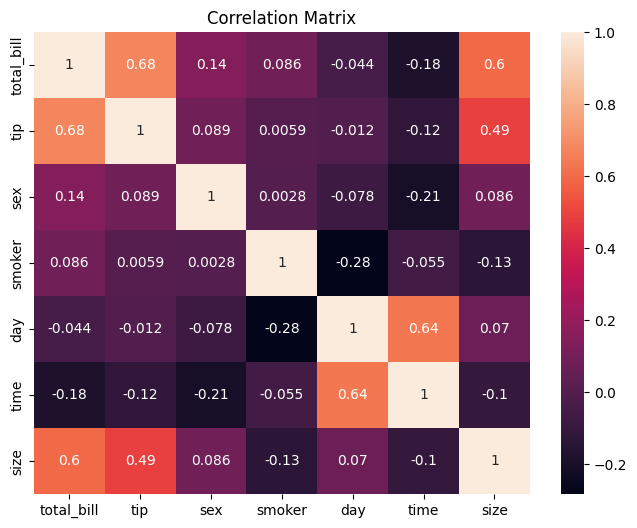

In [11]:
# now we will construct a correlational matrix to identify which features have strong correlations with tip and accordingly use the required features in different models
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [12]:
# according to this correlational matrix the most important features seams to be total_bill and size however certain models like  tree-based and ensemble models like Decision Trees and Random Forests can sometimes capture non-linear interactions and benefit from categorical features, so we will include all features for those models

Linear Regression

In [13]:
# to simplify for linear ,lasso and ridge regressions we will only consider total_bill and size for the model training
X = data[['total_bill', 'size']]
y = data['tip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Linear Regression Results:
RMSE: 0.805356827160701, MAE: 0.6639235737596481, R2 Score: 0.4811084097989494


Ridge Regression

In [14]:
# Initialize and train the ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# predictions
y_pred = ridge_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Ridge Regression Results:
RMSE: 0.8052244191160453, MAE: 0.6641916620018601, R2 Score: 0.4812790168407709


Lasso Regression

In [15]:

# Initialize and train the lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# predictions
y_pred = lasso_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Lasso Regression Results:
RMSE: 0.7823714743845914, MAE: 0.654882734592278, R2 Score: 0.5103046751866707


Decision Tree

In [16]:
# now for tree models we will use all the features as they capture the non-linearity and noise in the model
X = data.drop(columns=['tip'])
y = data['tip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# predictions
y_pred = tree_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Decision Tree Regression Results:
RMSE: 1.1888684381651764, MAE: 0.9224489795918368, R2 Score: -0.1307524517346701


Random Forest

In [17]:
# Initialize and train random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Random Forest Regression Results:
RMSE: 0.9818537918506146, MAE: 0.7736979591836738, R2 Score: 0.22875282524094065


SVM

In [18]:
# Initialize and train the Support Vector Regression model
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_train[['total_bill', 'size']], y_train)  # Use only selected features

# predictions
y_pred = svr_reg.predict(X_test[['total_bill', 'size']])

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

Support Vector Regression Results:
RMSE: 0.7568919278540891, MAE: 0.5912360427991569, R2 Score: 0.5416811812388796


KNN

In [19]:
# Initialize and train K-Nearest Neighbors model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train[['total_bill', 'size']], y_train)  # Use only selected features

# predictions
y_pred = knn_reg.predict(X_test[['total_bill', 'size']])

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regression Results:")
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score: {r2}")

K-Nearest Neighbors Regression Results:
RMSE: 0.8170382550432271, MAE: 0.6751020408163265, R2 Score: 0.4659465493119843


Some insights and actions that can be taken by the management for better tips:
1. Bill Size
Insight: The correlation analysis and model results likely indicate that total bill size is a strong predictor of tip amount. Larger bills generally result in higher tips.
Action : Encourage servers to promote high-value items or suggest additional items (e.g., appetizers, desserts, premium beverages) to increase the total bill value. 
2. Party Size 
Insight: The variable size shows a positive correlation with tips. Larger groups tend to leave higher tips in absolute terms.
Action : Allocate experienced staff to larger tables since these parties have the potential for higher tips.
3. Service Timing
Insight: Certain times of day might be associated with higher or lower tipping behavior.
Action : Schedule more experienced servers during peak tipping times (like dinner) to maximize potential revenue. Alternatively, consider incentivizing servers working during lower-tipping times (like lunch) to maintain service quality across shifts.

Scatter Plot

Now here are some plots to analyse the linearity of the dataset

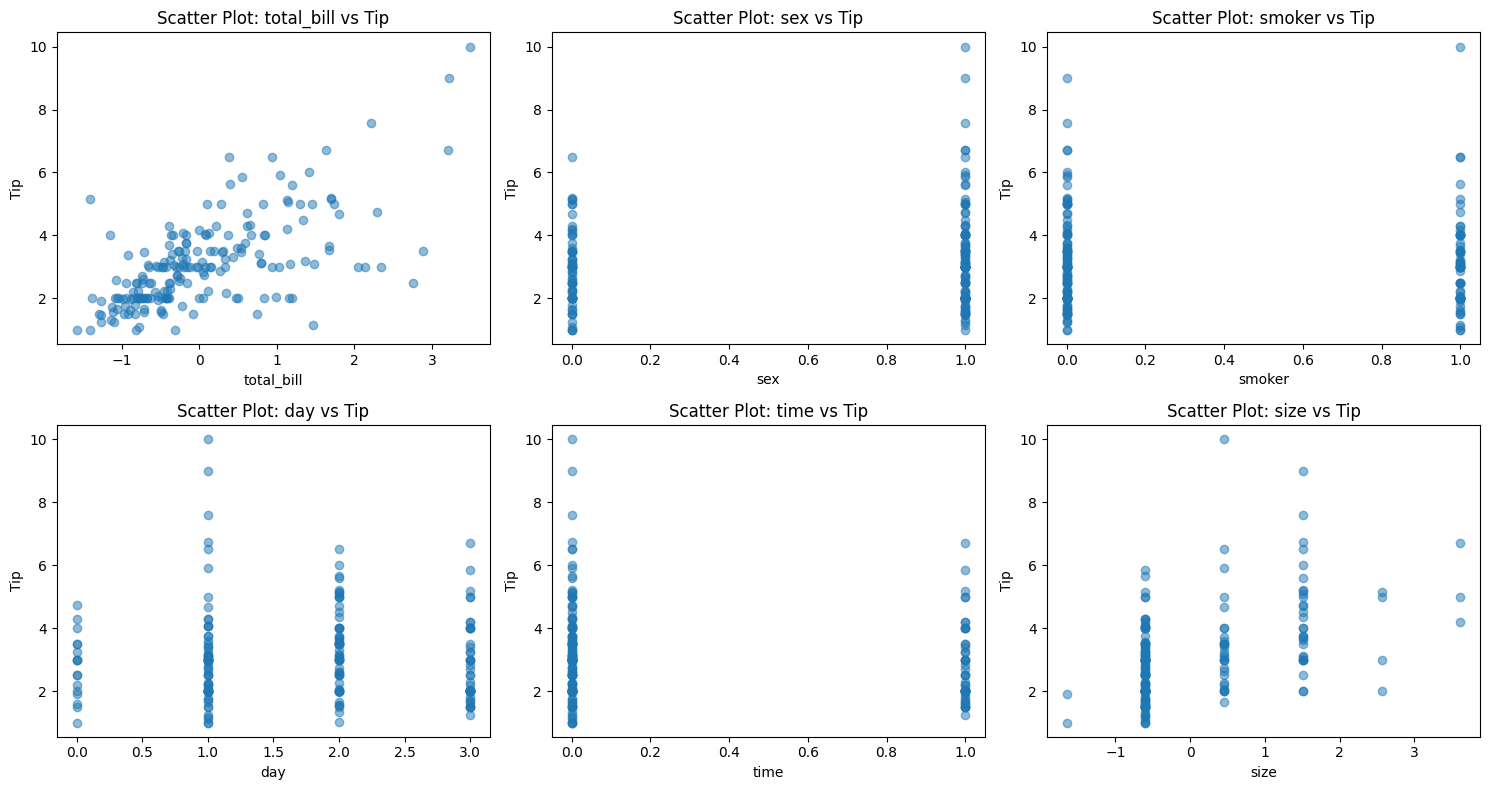

In [20]:
plt.figure(figsize=(15, 8))
for i, predictor in enumerate(X_train.columns, 1):
    plt.subplot(2, (len(X_train.columns) + 1) // 2, i)
    plt.scatter(X_train[predictor], y_train, alpha=0.5)
    plt.title(f'Scatter Plot: {predictor} vs Tip')
    plt.xlabel(predictor)
    plt.ylabel('Tip')
plt.tight_layout()
plt.show()

Pair Plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

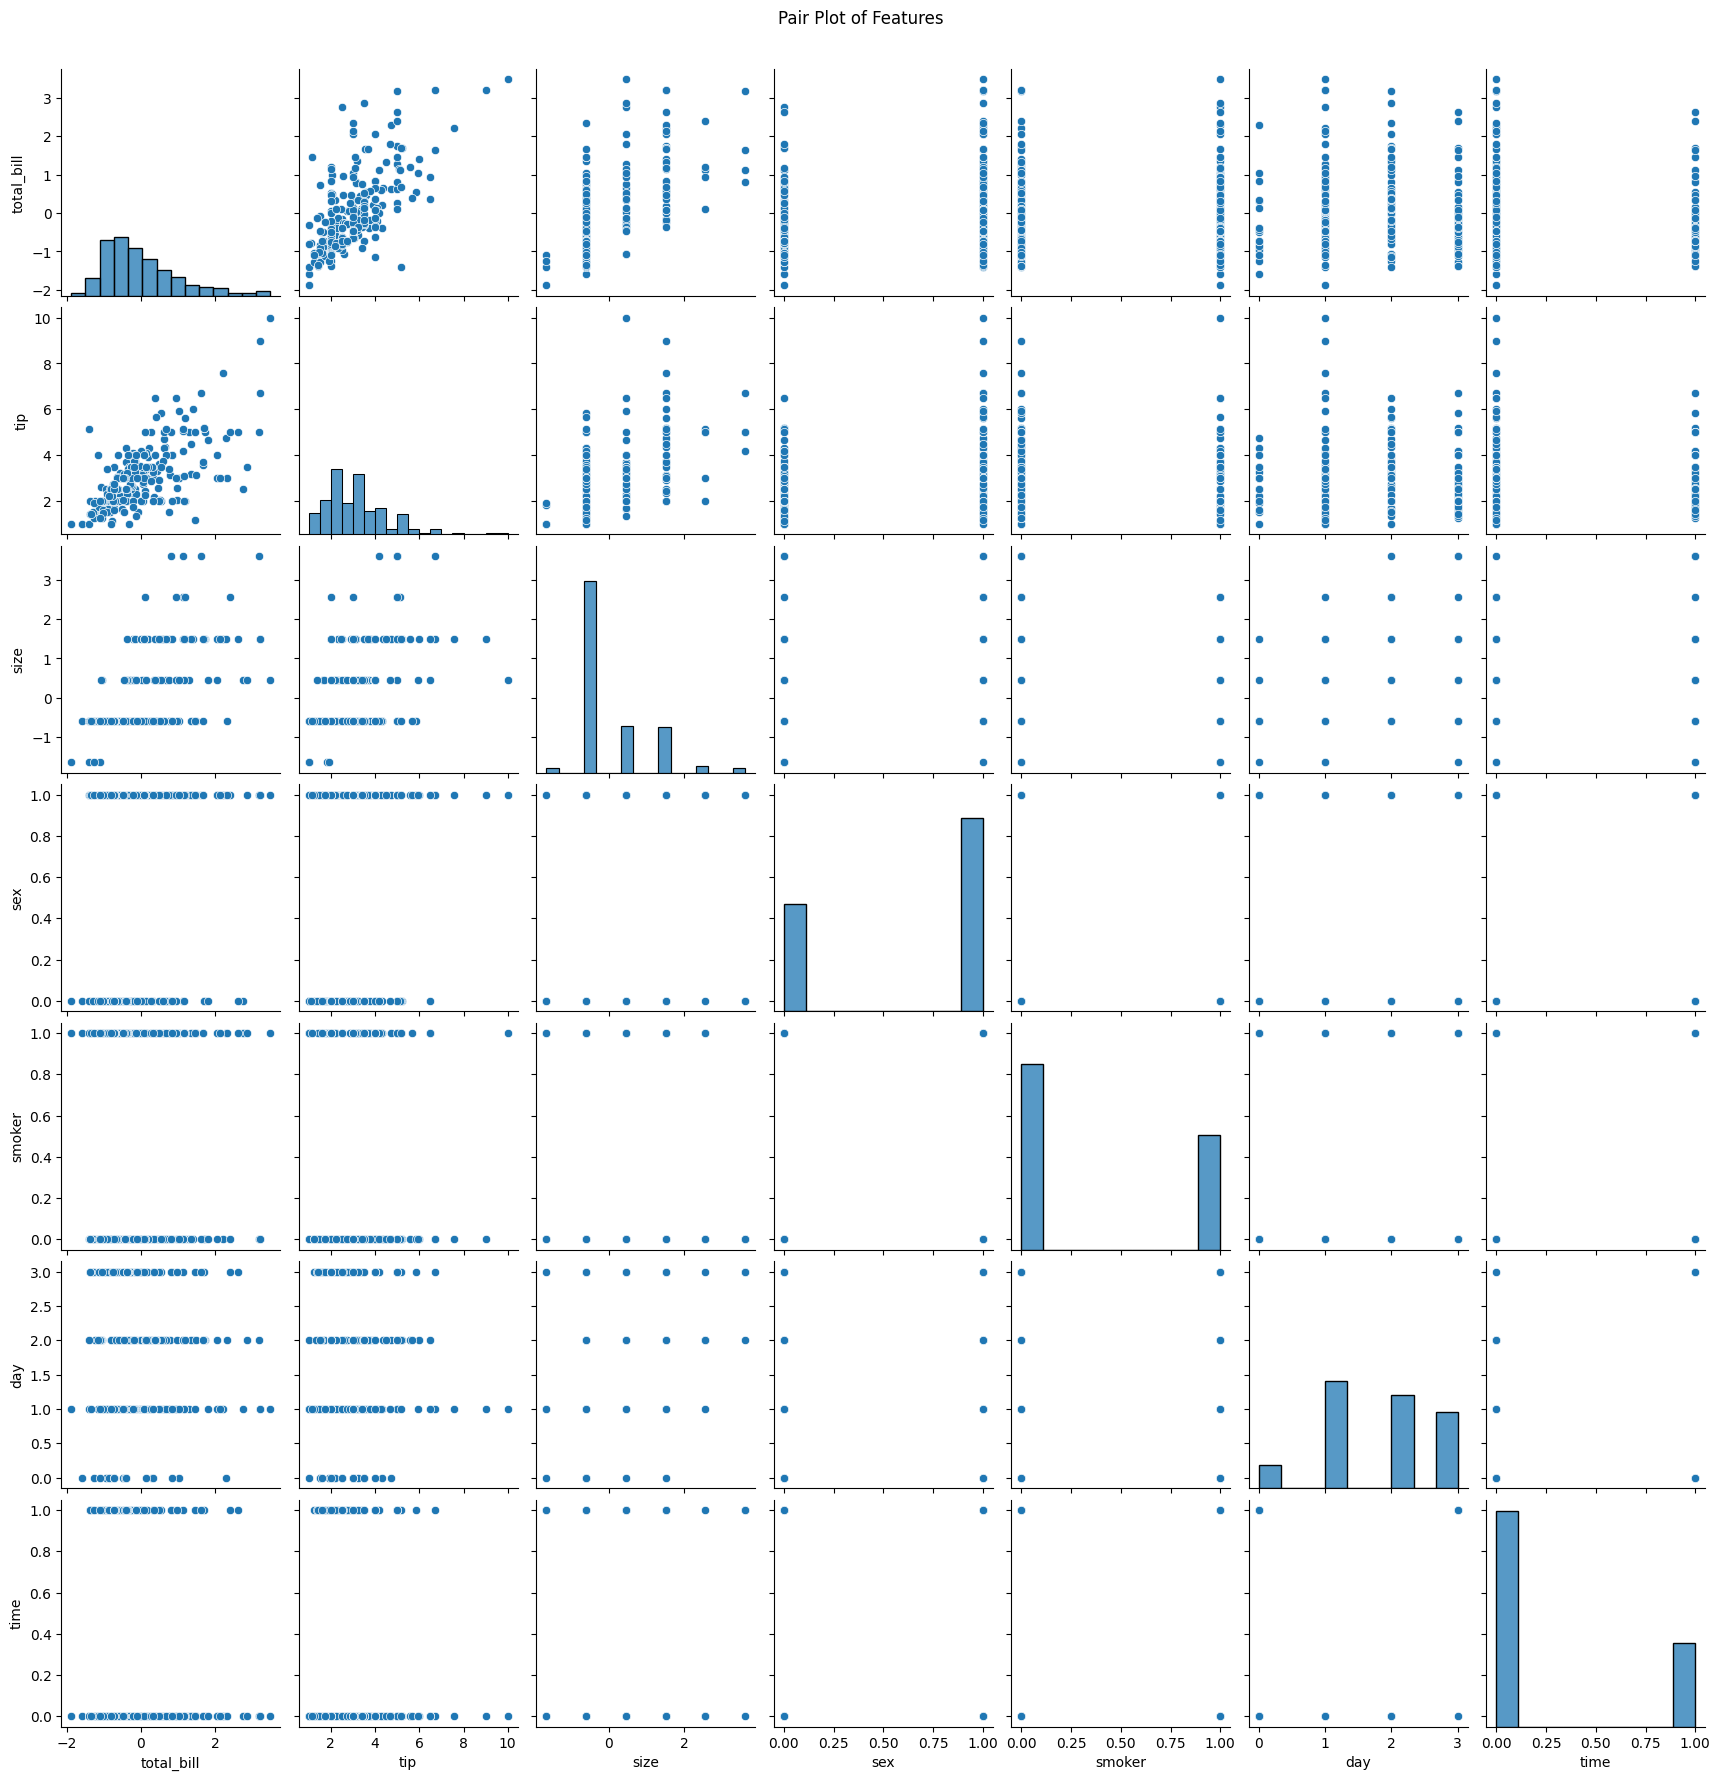

In [21]:
sns.pairplot(data[['total_bill', 'tip', 'size', 'sex', 'smoker', 'day', 'time']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

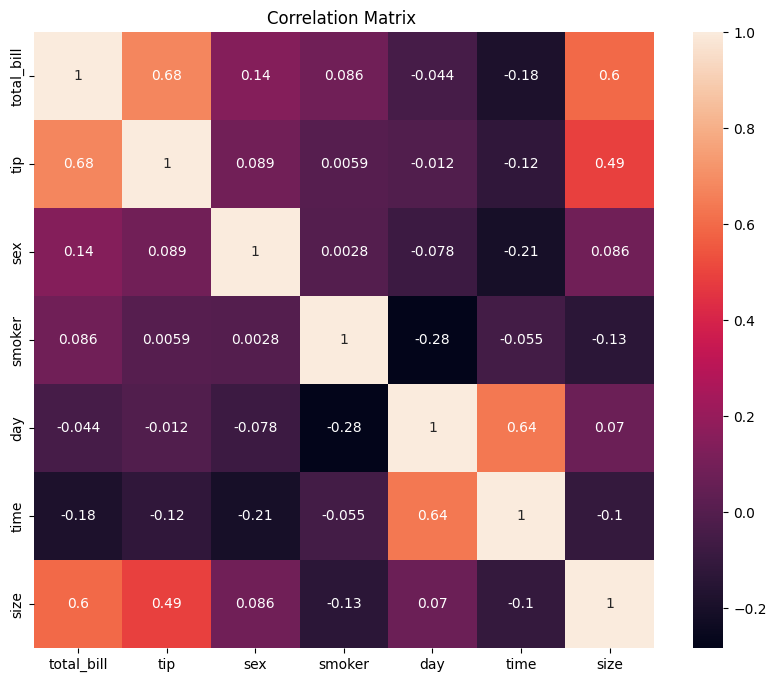

In [22]:
# although we have already constructed the correlational matrix earlier we will have it again
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix ')
plt.show()

Rainbow Test

In [23]:
# Prepare data for Rainbow test
X = data[['total_bill', 'size']]  
X = sm.add_constant(X)  
y = data['tip']

# Fit the model
linear_model = sm.OLS(y, X).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(linear_model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}")

# Interpretation
if rainbow_p_value < 0.05:
    print("The data does not follow a strictly linear trend (p < 0.05).")
else:
    print("The data may follow a linear trend (p >= 0.05).")

Rainbow Test Statistic: 1.1902656646832825, p-value: 0.17048935693447542
The data may follow a linear trend (p >= 0.05).


Residual Plots 

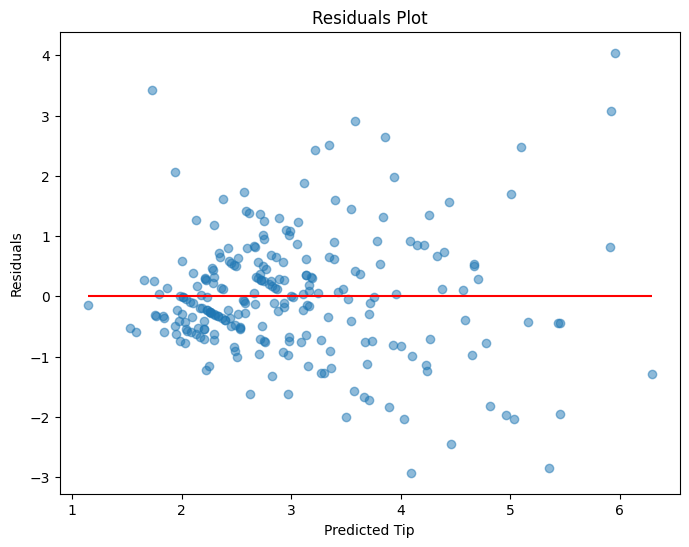

In [24]:
y_pred = linear_model.predict(X)
residuals = y - y_pred

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [25]:
# now as the graphs indicate linearity hence i will go ahead with linear regression

In [26]:
X = data[['total_bill', 'size']] 
y = data['tip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

Linear Regression Results:
RMSE: 0.805356827160701
MAE: 0.6639235737596481
R2 Score: 0.4811084097989494
